In [1]:
# Dependencies and Setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
from scipy import stats

weather_fire_2013_df = pd.read_csv('outputs/fireweather2013.csv')
fire_2013_df = pd.read_csv('outputs/fireweather2013clean.csv')

weather_fire_2015_df = pd.read_csv('outputs/fireweather2015.csv')
fire_2015_df = pd.read_csv('outputs/fireweather2015clean.csv')

weather_fire_2018_df = pd.read_csv('outputs_mergeable/weatherlat2018.csv')
fire_2018_df = pd.read_csv('outputs_mergeable/fire2018clean.csv')

weather_2013_full = pd.merge(weather_fire_2013_df, fire_2013_df, on="Latitude", how="outer")
weather_2013_full.count()

weather_2015_full = pd.merge(weather_fire_2015_df, fire_2015_df, on="Latitude", how="outer")
weather_2015_full.count()

weather_2018_full = pd.merge(weather_fire_2018_df, fire_2018_df, on="Latitude", how="outer")
weather_2018_full.count()

Unnamed: 0_x         304
Latitude             306
Longitude_x          304
Precipitation(MM)    304
Humidity             304
Temperature          304
Wind Speed           304
Wind Gust            304
Cloud Cover          304
Date                 304
Unnamed: 0_y         306
Unnamed: 0.1         306
Name                 306
Acres Burned         306
Longitude_y          306
Fire Started         306
Fire Extinguished    306
dtype: int64

In [2]:
weather_2013 = weather_2013_full.rename(columns={"Longitude_x": "Longitude", "Precipitation(MM)": "Precipitation"})
weather_2015 = weather_2015_full.rename(columns={"Longitude_x": "Longitude", "Precipitation(MM)": "Precipitation"})
weather_2018 = weather_2018_full.rename(columns={"Longitude_x": "Longitude", "Precipitation(MM)": "Precipitation"})

In [3]:
weather_2013 = weather_2013[["Name", "Latitude", "Longitude", "Acres Burned", "Date", "Temperature", "Humidity", "Precipitation", "Wind Speed", "Wind Gust"]]
weather_2013.head()

weather_2015 = weather_2015[["Name", "Latitude", "Longitude", "Acres Burned", "Date", "Temperature", "Humidity", "Precipitation", "Wind Speed", "Wind Gust"]]
weather_2015.head()

weather_2018 = weather_2018[["Name", "Latitude", "Longitude", "Acres Burned", "Date", "Temperature", "Humidity", "Precipitation", "Wind Speed", "Wind Gust"]]
weather_2018.head()

,Name,Latitude,Longitude,Acres Burned,Date,Temperature,Humidity,Precipitation,Wind Speed,Wind Gust
0,Aqueduct Fire,35.92436,-119.94083,30.0,2018-04-12,64.0,48.0,0.1,15.0,21.0
1,Haycamp Fire,35.96689,-121.28185,50.0,2018-02-07,68.0,58.0,0.0,5.0,9.0
2,Pleasant Fire,37.40208,-118.50235,2070.0,2018-02-18,47.0,35.0,0.1,11.0,16.0
3,Grant Fire,37.73835,-121.60390,12.0,2018-05-14,74.0,67.0,0.0,5.0,7.0
4,Patterson Fire,33.62924,-117.05992,1261.0,2018-05-17,67.0,65.0,0.0,5.0,7.0


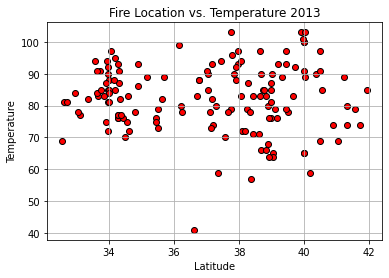

In [4]:
# Create a Scatter Plot for temperature vs fire location - to show if lat/long has an impact (probably won't)
x_values = weather_2013['Latitude']
y_values = weather_2013['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location vs. Temperature 2013')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.savefig("outputs/location_vs_temp_2013.png")
plt.show()

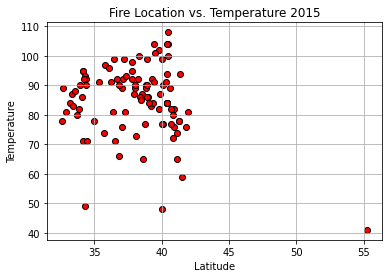

In [5]:
# Create a Scatter Plot for temperature vs fire location - to show if lat/long has an impact (probably won't)
x_values = weather_2015['Latitude']
y_values = weather_2015['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location vs. Temperature 2015')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.savefig("outputs/location_vs_temp_2015.png")
plt.show()

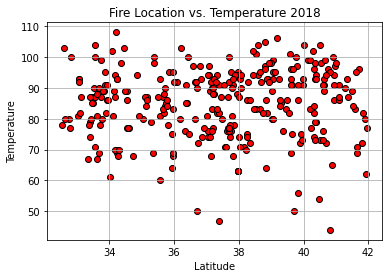

In [6]:
# Create a Scatter Plot for temperature vs fire location - to show if lat/long has an impact (probably won't)
x_values = weather_2018['Latitude']
y_values = weather_2018['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location vs. Temperature 2018')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.savefig("outputs/location_vs_temp_2018.png")
plt.show()

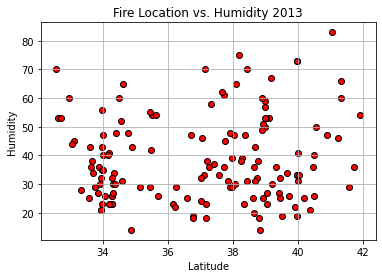

In [7]:
# Create a Scatter Plot for fire location vs humidity
x_values = weather_2013['Latitude']
y_values = weather_2013['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location vs. Humidity 2013')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig("outputs/location_vs_humidty_2013.png")
plt.show()

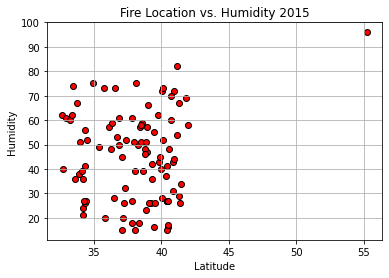

In [8]:
# Create a Scatter Plot for fire location vs humidity
x_values = weather_2015['Latitude']
y_values = weather_2015['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location vs. Humidity 2015')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig("outputs/location_vs_humidty_2015.png")
plt.show()

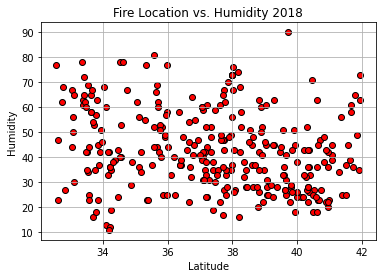

In [9]:
# Create a Scatter Plot for fire location vs humidity
x_values = weather_2018['Latitude']
y_values = weather_2018['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location vs. Humidity 2018')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig("outputs/location_vs_humidty_2018.png")
plt.show()

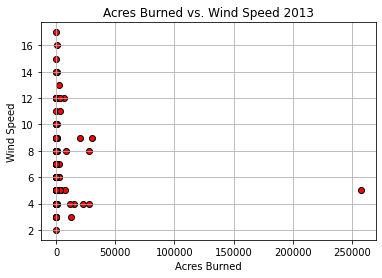

In [10]:
# Create a Scatter Plot for fire size vs wind 
x_values = weather_2013['Acres Burned']
y_values = weather_2013['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Speed 2013')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("outputs/fire_size_vs_wind_speed_2013.png")
plt.show()

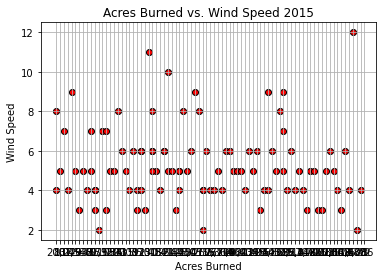

In [11]:
# Create a Scatter Plot for fire size vs wind 
x_values = weather_2015['Acres Burned']
y_values = weather_2015['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Speed 2015')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("outputs/fire_size_vs_wind_speed_2013.png")
plt.show()

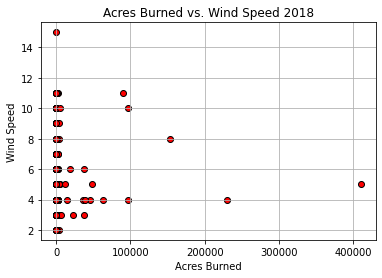

In [12]:
# Create a Scatter Plot for fire size vs wind 
x_values = weather_2018['Acres Burned']
y_values = weather_2018['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Speed 2018')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("outputs/fire_size_vs_wind_speed_2018.png")
plt.show()

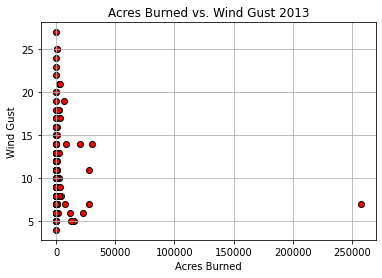

In [13]:
# Create a Scatter Plot for fire size vs wind gust
x_values = weather_2013['Acres Burned']
y_values = weather_2013['Wind Gust']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Gust 2013')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Gust')
plt.grid(True)
plt.savefig("outputs/fire_size_vs_wind_gust_2013.png")
plt.show()

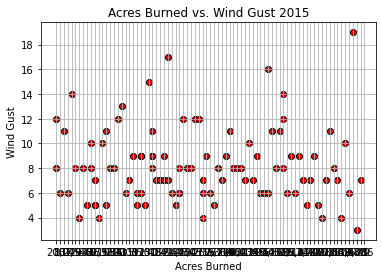

In [14]:
# Create a Scatter Plot for fire size vs wind gust
x_values = weather_2015['Acres Burned']
y_values = weather_2015['Wind Gust']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Gust 2015')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Gust')
plt.grid(True)
plt.savefig("outputs/fire_size_vs_wind_gust_2015.png")
plt.show()

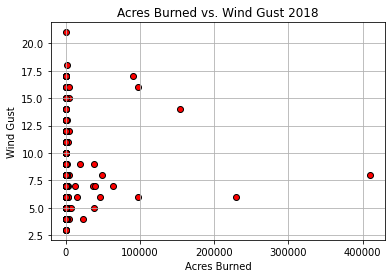

In [15]:
# Create a Scatter Plot for fire size vs wind gust
x_values = weather_2018['Acres Burned']
y_values = weather_2018['Wind Gust']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Gust 2018')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Gust')
plt.grid(True)
plt.savefig("outputs/fire_size_vs_wind_gust_2018.png")
plt.show()

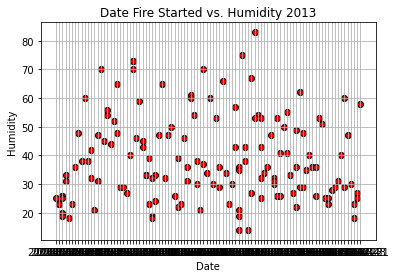

In [16]:
# Create a Scatter Plot for start date vs humidity
x_values = weather_2013['Date']
y_values = weather_2013['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Humidity 2013')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig("outputs/start_date_vs_humidity_2013.png")
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

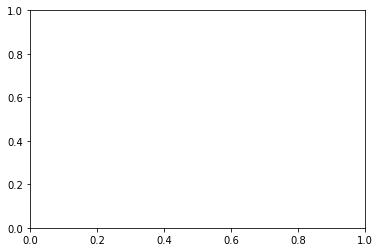

In [17]:
# Create a Scatter Plot for start date vs humidity
x_values = weather_2015['Date']
y_values = weather_2015['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Humidity 2015')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig("outputs/start_date_vs_humidity_2015.png")
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

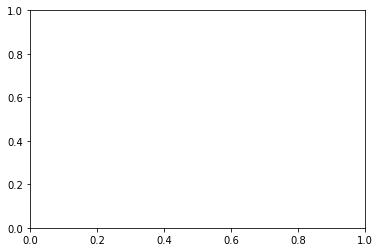

In [18]:
# Create a Scatter Plot for start date vs humidity
x_values = weather_2018['Date']
y_values = weather_2018['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Humidity 2018')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig("outputs/start_date_vs_humidity_2018.png")
plt.show()

In [ ]:
# Create a Scatter Plot for temperature vs start date - to show if temperature affects fire breaking out
x_values = weather_2013['Date']
y_values = weather_2013['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Temperature 2013')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.savefig("outputs/start_date_vs_temp_2013.png")
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

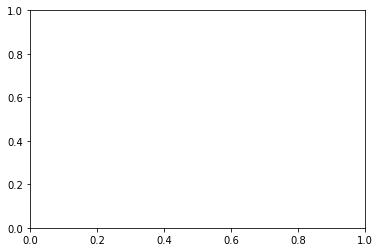

In [19]:
# Create a Scatter Plot for temperature vs start date - to show if temperature affects fire breaking out
x_values = weather_2015['Date']
y_values = weather_2015['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Temperature 2015')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.savefig("outputs/start_date_vs_temp_2015.png")
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

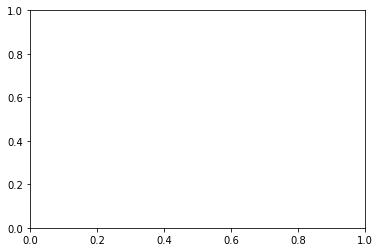

In [20]:
# Create a Scatter Plot for temperature vs start date - to show if temperature affects fire breaking out
x_values = weather_2018['Date']
y_values = weather_2018['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Temperature 2018')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.savefig("outputs/start_date_vs_temp_2018.png")
plt.show()

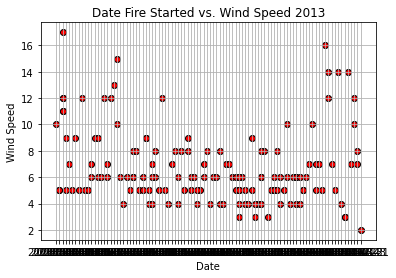

In [21]:
# Create a Scatter Plot for wind speed vs start date - to show if temperature affects fire breaking out
x_values = weather_2013['Date']
y_values = weather_2013['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Wind Speed 2013')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("outputs/start_date_vs_wind_2013.png")
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

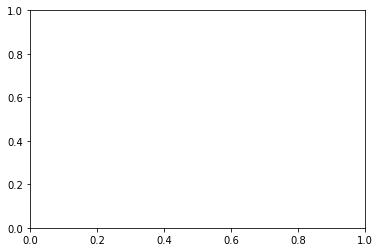

In [22]:
# Create a Scatter Plot for wind speed vs start date - to show if temperature affects fire breaking out
x_values = weather_2015['Date']
y_values = weather_2015['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Wind Speed 2015')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("outputs/start_date_vs_wind_2015.png")
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

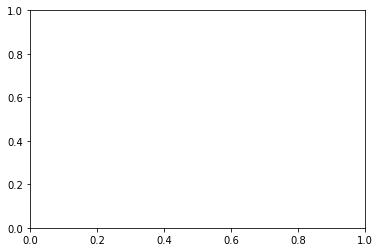

In [23]:
# Create a Scatter Plot for wind speed vs start date - to show if temperature affects fire breaking out
x_values = weather_2018['Date']
y_values = weather_2018['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Wind Speed 2018')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("outputs/start_date_vs_wind_2018.png")
plt.show()